# **CS224W - Colab 1**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [10]:
G = nx.karate_club_graph()

# G is an undirected graph : 양방향 그래프
type(G)

networkx.classes.graph.Graph

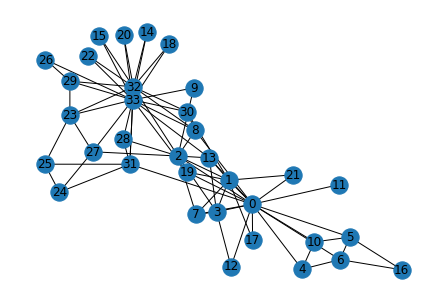

In [11]:
# Visualize the graph
nx.draw(G, with_labels = True)

# 34명의 멤버들이 있는 Zachary의 Karate Club 네트워크.

## Question 1: What is the average degree of the karate club network? (5 Points)

In [12]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  # num_edges
  # num_nodes

  avg_degree = (num_edges * 2) / num_nodes
  avg_degree = np.round(avg_degree)

  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5.0


In [102]:
def average_degree2(num_edges, num_nodes):
  avg_degree = (num_edges * 2) / num_nodes
  return round(avg_degree, 2)

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()

avg_degree = average_degree2(num_edges, num_nodes)
print(avg_degree)

4.59


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [13]:
# Get number of nodes
# Loop through all the nodes
# Set data = True will return node attributes

for node in G.nodes(data=True):
  print(node)

(0, {'club': 'Mr. Hi'})
(1, {'club': 'Mr. Hi'})
(2, {'club': 'Mr. Hi'})
(3, {'club': 'Mr. Hi'})
(4, {'club': 'Mr. Hi'})
(5, {'club': 'Mr. Hi'})
(6, {'club': 'Mr. Hi'})
(7, {'club': 'Mr. Hi'})
(8, {'club': 'Mr. Hi'})
(9, {'club': 'Officer'})
(10, {'club': 'Mr. Hi'})
(11, {'club': 'Mr. Hi'})
(12, {'club': 'Mr. Hi'})
(13, {'club': 'Mr. Hi'})
(14, {'club': 'Officer'})
(15, {'club': 'Officer'})
(16, {'club': 'Mr. Hi'})
(17, {'club': 'Mr. Hi'})
(18, {'club': 'Officer'})
(19, {'club': 'Mr. Hi'})
(20, {'club': 'Officer'})
(21, {'club': 'Mr. Hi'})
(22, {'club': 'Officer'})
(23, {'club': 'Officer'})
(24, {'club': 'Officer'})
(25, {'club': 'Officer'})
(26, {'club': 'Officer'})
(27, {'club': 'Officer'})
(28, {'club': 'Officer'})
(29, {'club': 'Officer'})
(30, {'club': 'Officer'})
(31, {'club': 'Officer'})
(32, {'club': 'Officer'})
(33, {'club': 'Officer'})


In [19]:
# Node Degree
print(G.degree[1])

9


In [20]:
for neighbor in G.neighbors(1):
  print(f'Node 1 has neighbor {neighbor}')

Node 1 has neighbor 0
Node 1 has neighbor 2
Node 1 has neighbor 3
Node 1 has neighbor 7
Node 1 has neighbor 13
Node 1 has neighbor 17
Node 1 has neighbor 19
Node 1 has neighbor 21
Node 1 has neighbor 30


In [35]:
print(G)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [41]:
print(G.number_of_edges())
print(G.edges())

78
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [28]:
# print(len(G.neighbors(1)))
print(G.degree[1])

9


In [31]:
# Edges of neighboring nodes를 어케 구함?
print(G.number_of_edges())


78


In [22]:
import itertools
arr = ['A', 'B', 'C']
nCr = itertools.combinations(arr, 2)
print(list(nCr))
# print(len(nCr))

[('A', 'B'), ('A', 'C'), ('B', 'C')]


In [51]:
import operator as op
from functools import reduce

# Combination 개수
# https://brownbears.tistory.com/459

def nCr(n, r):
    if n < 1 or r < 0 or n < r:
        raise ValueError
    r = min(r, n-r)
    numerator = reduce(op.mul, range(n, n-r, -1), 1)
    denominator = reduce(op.mul, range(1, r+1), 1)
    return numerator // denominator

print(nCr(3, 2))
print(nCr(4, 2))

3
6


In [52]:
num_nodes = G.number_of_nodes()
print(num_nodes)

k = 0
for i in range(num_nodes):
  print(G.degree[i])
  k += 1

print(f'WowWowWow {k}')

34
16
9
10
6
3
4
4
4
5
2
3
1
2
5
2
2
2
2
2
3
2
2
2
5
3
3
2
4
3
4
4
6
12
17
WowWowWow 34


In [105]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function

  # 2강 22쪽
  # e_v = (# edges among neighboring nodes) / (k_v C 2)
  
  # k_v : # (node pairs among k_v neighboring nodes)
  
  # get number of edges : num_edges = G.number_of_edges()
  # get number of nodes : num_nodes = G.number_of_nodes() 

  # Clustering Coefficient는 Node마다 구하는 것이기 때문에, Node마다 이것을 구한 다음 마지막에 average를 구해야 하지 않을까?

  # cluster_coef_per = 0

  # Node의 개수 구하기가 G.number_of_nodes()임.
  # num_nodes = G.number_of_nodes()

  # # e_v = a / b 이런식으로 구하려고 해요.
  # for i in range(num_nodes):
  #   # print(G.degree[1])
  #   b = nCr(G.degree[i], 2)
  #   a
  
  # 그냥 명령어 쓰면 됨.
  
  avg_cluster_coef = nx.average_clustering(G)
  avg_cluster_coef = round(avg_cluster_coef, 2)

  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


In [104]:
from itertools import combinations

def average_clustering_coffecient2(G):
  # 2강 22쪽 : 그 주위에 삼각형이 얼마나 있는가. 이거를 생각하면 된다.
  num_nodes = G.number_of_nodes()
  edge_list = list(G.edges())

  avg_cluster_coef = 0

  for node_idx in range(num_nodes):
    NB = list(G.neighbors(node_idx))
    NB_comb = list(combinations(NB, 2))
    num_edges_NB = len(set(edge_list) & set(NB_comb))

    if num_edges_NB > 0:
      cluster_coef = num_edges_NB / len(NB_comb)
      avg_cluster_coef += cluster_coef
    avg_cluster_coef /= num_nodes
    return round(avg_cluster_coef, 2)

  avg_cluster_coef = average_clustering_coffecient2(G)
  print(avg_cluster_coef)

## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Please complete the code block by implementing the PageRank equation: $r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$

In [98]:
for neighbor in G.neighbors(1):
  print(f'Node 1 has neighbor {neighbor}')

Node 1 has neighbor 0
Node 1 has neighbor 2
Node 1 has neighbor 3
Node 1 has neighbor 7
Node 1 has neighbor 13
Node 1 has neighbor 17
Node 1 has neighbor 19
Node 1 has neighbor 21
Node 1 has neighbor 30


In [99]:
r0 = 1 / G.number_of_nodes()
print(G.number_of_nodes())
print(r0)

34
0.029411764705882353


In [100]:
for neighbor in G.neighbors(0):
  print(G.degree[neighbor])

9
10
6
3
4
4
4
5
3
1
2
5
2
3
2
6


In [63]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.

  r1 = 0

  ############# Your code here ############
  ## Note: 
  ## 1: You should not use nx.pagerank
  # r1 = nx.pagerank(G, alpha=beta)

  # nx.pagerank
  # https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

  # beta : Damping parameter for PageRank
  # N : number of nodes : Node의 개수를 의미.

  ##########################
  # Beta의 의미 : 2과에서 p.32에 있는 것 참고하기.
  # Spider Traps (Self-Loop) 문제를 해결하기 위해 Betaㄹ르 도입함.
  # Spider Traps - All out-links are within the group - Eventually spider traps absorb all importance.

  # Solution for spider traps :
  # At each time step, the random surfer has 2 options
  # 1) With prob. beta, follow a link at random.
  # 2) With prob. 1-beta, jump to a random page.

  ##########################
  # Random Teleports : 2과에서 p.35에 있는 것 참고하기.
  # PageRank Equation [Brin-Page, 98]

  for neighbor in G.neighbors(node_id):
    r1 += beta * r0 / G.degree[neighbor]
  
  r1 += (1-beta) / G.number_of_nodes()

  r1 = round(r1, 2)

  #########################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
# the PageRank value for node 0 (node with id 0) after one PageRank iteration 이므로 r0을 투입한다.
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.13


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [67]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality 
  # for a node in karate club network. G is the input karate club 
  # network and node is the node id in the graph. Please round the 
  # closeness centrality result to 2 decimal places.

  closeness = 0

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.

  # Note 1) networkx의 closeness centrality function을 활용하기.
  closeness = nx.closeness_centrality(G, node)

  # Note 2) 정규화를 시키기 위함.
  closeness = closeness / (len(nx.node_connected_component(G, node)) - 1)

  closeness = round(closeness, 2)

  #########################################

  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality {}".format(closeness))

The karate club network has closeness centrality 0.01


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [68]:
import torch
print(torch.__version__)

1.12.0+cu113


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [69]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.4329, 0.2444, 0.1320, 0.5050],
        [0.5195, 0.8661, 0.5487, 0.8483],
        [0.4683, 0.1696, 0.0080, 0.5142]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [70]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Getting the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

In [71]:
print(nx.Graph(G))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [79]:
# Edge List를 출력해야 한다.
print(G.edges())
print(len(G.edges()))

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
78


In [90]:
for i in G.edges():
  print(i)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 17)
(0, 19)
(0, 21)
(0, 31)
(1, 2)
(1, 3)
(1, 7)
(1, 13)
(1, 17)
(1, 19)
(1, 21)
(1, 30)
(2, 3)
(2, 7)
(2, 8)
(2, 9)
(2, 13)
(2, 27)
(2, 28)
(2, 32)
(3, 7)
(3, 12)
(3, 13)
(4, 6)
(4, 10)
(5, 6)
(5, 10)
(5, 16)
(6, 16)
(8, 30)
(8, 32)
(8, 33)
(9, 33)
(13, 33)
(14, 32)
(14, 33)
(15, 32)
(15, 33)
(18, 32)
(18, 33)
(19, 33)
(20, 32)
(20, 33)
(22, 32)
(22, 33)
(23, 25)
(23, 27)
(23, 29)
(23, 32)
(23, 33)
(24, 25)
(24, 27)
(24, 31)
(25, 31)
(26, 29)
(26, 33)
(27, 33)
(28, 31)
(28, 33)
(29, 32)
(29, 33)
(30, 32)
(30, 33)
(31, 32)
(31, 33)
(32, 33)


In [108]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  edge_list = []

  ############# Your code here ############

  for i in G.edges():
    edge_list.append(i)

  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  # edge_index = torch.tensor(edge_list)

  edge_index = torch.tensor(edge_list).T
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
# print(pos_edge_list)
# print(len(pos_edge_list))

pos_edge_index = edge_list_to_tensor(pos_edge_list)
# print(pos_edge_index)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))
print(pos_edge_list)
print(pos_edge_index)
# print(pos_edge_index.T)
print(len(pos_edge_list))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5

## Question 6: Please implement following function that samples negative edges. Then you will answer which edges (edge_1 to edge_5) can be negative ones in the karate club network? (10 Points)

In [111]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loop should 
  # not be considered as either a positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph, if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?

  neg_edge_list = []

  ############# Your code here ############
  pos_edge_list = graph_to_edge_list(G)
  
  for node1 in G.nodes():
    for node2 in G.nodes():
      # Self-Loop도 고려하기!
      # If-Continue문을 활용함으로써 특정 조건을 만족하는 것에 대해서만 이 프로세스를 진행한다.
      if node1 >= node2:
        continue
      if (node1, node2) in pos_edge_list:
        continue
      neg_edge_list.append((node1, node2))

  neg_edge_list = random.sample(neg_edge_list, num_neg_samples)

  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))
print(neg_edge_index)

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
pos_edge_list = graph_to_edge_list(G)

for edge in [edge_1, edge_2, edge_3, edge_4, edge_5]:
  edge = (edge[1], edge[0]) if edge[0] > edge[1] else edge
  if edge in pos_edge_list:
    print('No')
  else:
    print('Yes')

#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
tensor([[ 8, 13, 10, 11, 12, 18,  1, 12,  3,  4, 11,  9,  3,  3,  4,  8,  6,  9,
          4,  1, 22,  9,  1, 10, 11,  0, 18, 21,  3,  5,  1,  6, 27, 20,  4,  7,
         11, 12, 25, 14, 11,  4, 10, 14, 13,  6,  7,  7,  6,  2,  4,  9, 21,  1,
         16,  8, 10, 18, 10,  1, 25,  9, 22, 14, 19,  8, 19,  9, 21, 16,  1,  6,
         15,  2,  8, 21,  0, 12],
        [13, 15, 24, 33, 33, 28,  9, 27, 11, 29, 27, 27,  9,  6,  9, 19, 26, 12,
         16, 22, 23, 18, 12, 27, 31, 16, 31, 26, 29, 20, 20, 12, 32, 27, 23, 18,
         24, 17, 28, 21, 32, 22, 19, 26, 20, 33, 33, 19, 13, 20, 11, 16, 32, 31,
         18, 29, 25, 20, 29,  6, 30, 28, 27, 20, 32, 11, 24, 29, 22, 17, 23, 17,
         25, 10, 14, 27, 23, 18]])
No
Yes
No
No
Yes


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [112]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.12.0+cu113


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [118]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))
print(emb_sample)

Sample embedding layer: Embedding(4, 8)
Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [119]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones

# emb_sample의 Weight Data에 torch.ones로 1로 다 채워버린다.
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 1.7412,  2.2168, -0.0522, -1.8066, -1.1247, -1.0941, -1.5638,  0.1560]],
       grad_fn=<EmbeddingBackward0>)
tensor([[ 1.7412,  2.2168, -0.0522, -1.8066, -1.1247, -1.0941, -1.5638,  0.1560],
        [-0.5674, -0.7897,  0.8803, -3.2142, -0.9411,  1.6430,  1.3490,  0.9815]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [124]:
# Node Embedding : 결국에는 Node2Vec으로 Node를 Vector 상에 나타낸다는 뜻이겠지.
# 차원축소를 해서 말이야. 데이터의 핵심을 파악하기 위함이라고 판단할 수 있겠다.

# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############

  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)

  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[-1.5256, -0.7502, -0.6540, -1.6095, -0.1002, -0.6092, -0.9798, -1.6091,
         -0.7121,  0.3037, -0.7773, -0.2515, -0.2223,  1.6871,  0.2284,  0.4676],
        [-0.9274,  0.5451,  0.0663, -0.4370,  0.7626,  0.4415,  1.1651,  2.0154,
          0.1374,  0.9386, -0.1860, -0.6446,  1.5392, -0.8696, -3.3312, -0.7479]],
       grad_fn=<EmbeddingBackward0>)


In [129]:
print(emb(ids)[0])
print(emb(ids)[1])
print(emb(ids)[-1])

tensor([-1.5256, -0.7502, -0.6540, -1.6095, -0.1002, -0.6092, -0.9798, -1.6091,
        -0.7121,  0.3037, -0.7773, -0.2515, -0.2223,  1.6871,  0.2284,  0.4676],
       grad_fn=<SelectBackward0>)
tensor([-0.9274,  0.5451,  0.0663, -0.4370,  0.7626,  0.4415,  1.1651,  2.0154,
         0.1374,  0.9386, -0.1860, -0.6446,  1.5392, -0.8696, -3.3312, -0.7479],
       grad_fn=<SelectBackward0>)
tensor([-0.9274,  0.5451,  0.0663, -0.4370,  0.7626,  0.4415,  1.1651,  2.0154,
         0.1374,  0.9386, -0.1860, -0.6446,  1.5392, -0.8696, -3.3312, -0.7479],
       grad_fn=<SelectBackward0>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then visualize each point, colored by the community it belongs to.

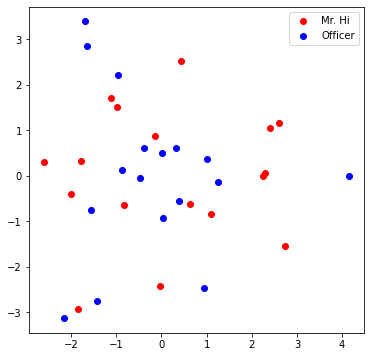

In [121]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points)

In [122]:
from torch.optim import SGD

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############

  # torch.round를 활용한 반올림
  # 이를 통해서 0.5보다 크면 1에 배정되기 때문에, 이것이 label 1과 같은지 확인하면 됨.
  # 반대로 0.5보다 작으면 0에 배정되기 때문에, 이것이 label 0과 같은지 확인하면 됨.

  accu = torch.sum(torch.round(pred) == label) / pred.shape[0]

  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############

    # (1) Get the embeddings of the nodes in train_edge
    # (2) Dot product the embeddings between each node pair
    # (3) Feed the dot product result into sigmoid
    # (4) Feed the sigmoid output into the loss_fn
    # (5) Print both loss and accuracy of each epoch 

    optimizer.zero_grad()
    node_emb = emb(train_edge)
    dot_product = torch.sum(node_emb[0] * node_emb[1], -1)
    result = sigmoid(dot_product)
    loss = loss_fn(result, train_label)
    print(f'Epoch : {i}, Loss : {loss.item()}, Accuracy : {accuracy(result, train_label).item()}')
    loss.backward()
    optimizer.step()

    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
# Positive Label
pos_label = torch.ones(pos_edge_index.shape[1], )
# Negative Label
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)

Epoch : 0, Loss : 1.771653413772583, Accuracy : 0.5192307829856873
Epoch : 1, Loss : 1.7627907991409302, Accuracy : 0.5192307829856873
Epoch : 2, Loss : 1.7460376024246216, Accuracy : 0.5256410241127014
Epoch : 3, Loss : 1.7223535776138306, Accuracy : 0.5256410241127014
Epoch : 4, Loss : 1.6926711797714233, Accuracy : 0.5320512652397156
Epoch : 5, Loss : 1.6578567028045654, Accuracy : 0.5448718070983887
Epoch : 6, Loss : 1.6187628507614136, Accuracy : 0.5384615659713745
Epoch : 7, Loss : 1.5761542320251465, Accuracy : 0.5384615659713745
Epoch : 8, Loss : 1.5307506322860718, Accuracy : 0.5384615659713745
Epoch : 9, Loss : 1.4832329750061035, Accuracy : 0.557692289352417
Epoch : 10, Loss : 1.4341871738433838, Accuracy : 0.557692289352417
Epoch : 11, Loss : 1.3841707706451416, Accuracy : 0.557692289352417
Epoch : 12, Loss : 1.3336739540100098, Accuracy : 0.557692289352417
Epoch : 13, Loss : 1.2831251621246338, Accuracy : 0.5705128312110901
Epoch : 14, Loss : 1.2329010963439941, Accuracy :

In [132]:
print(train_edge)
print(train_edge.shape)

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 26, 26, 27, 28, 28, 29,
         29, 30, 30, 31, 31, 32,  8, 13, 10, 11, 12, 18,  1, 12,  3,  4, 11,  9,
          3,  3,  4,  8,  6,  9,  4,  1, 22,  9,  1, 10, 11,  0, 18, 21,  3,  5,
          1,  6, 27, 20,  4,  7, 11, 12, 25, 14, 11,  4, 10, 14, 13,  6,  7,  7,
          6,  2,  4,  9, 21,  1, 16,  8, 10, 18, 10,  1, 25,  9, 22, 14, 19,  8,
         19,  9, 21, 16,  1,  6, 15,  2,  8, 21,  0, 12],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  2,  3,
          7, 13, 17, 19, 21, 30,  3,  7,  8,  9, 13, 27, 28, 32,  7, 12, 13,  6,
         10,  6, 10, 16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32,
         33, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31

In [133]:
print(train_label)
print(train_label.shape)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
torch.Size([156])


## Visualize the final node embeddings
Visualize your final embedding here! 
You can visually compare the figure with the previous embedding figure. 
After training, you should oberserve that the two classes are more evidently separated. 
This is a great sanitity check for your implementation as well.

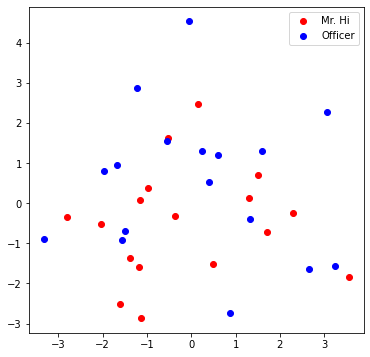

In [123]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

In order to get credit, you must go submit your answers on Gradescope.